In [26]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU,Reshape,Conv2DTranspose,Conv2D
from tensorflow.keras.utils import plot_model ## to plot image of model
import numpy as np

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# summarize the shape of the dataset
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


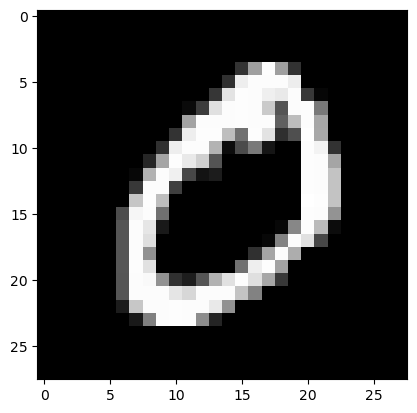

In [28]:
plt.imshow(x_train[1], cmap='gray')

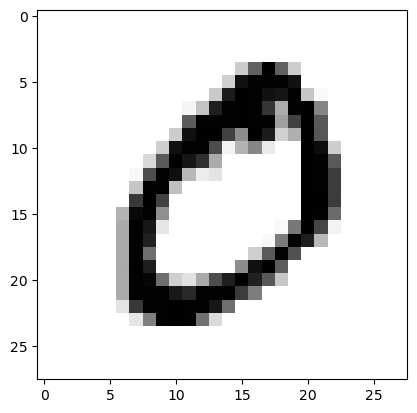

In [29]:
plt.imshow(x_train[1], cmap='gray_r')

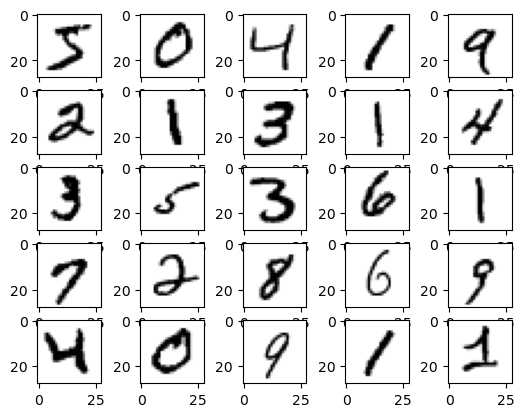

In [30]:
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.axis('on')
    plt.imshow(x_train[i], cmap='gray_r')
plt.show()

In [31]:
img_row=28
img_col=28
channel=1
in_shape=[img_row,img_row,channel]

In [32]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
 model = Sequential()
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Flatten())
 model.add(Dense(1, activation='sigmoid'))
# compile model
 opt = Adam(0.0002, 0.5) ### learning rate and momentum 
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model

In [33]:
model = define_discriminator()

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [35]:
def load_real_sample():
    (trainX,_), (_, _) =  mnist.load_data()
    train_x = np.expand_dims(trainX, axis=3)
    train_x = train_x.astype('float32')
    train_x = train_x / train_x.max()
    return train_x

In [36]:
def generate_real_samples(dataset, n_samples):
 ix = np.random.randint(0, dataset.shape[0], n_samples) ## get n_sample random images from the entire data set 
 X = dataset[ix]
 y = np.ones((n_samples, 1))
 return X, y

In [37]:
def generate_fake_samples(n_samples):
 X = np.random.rand(28 * 28 * n_samples)
 X = X.reshape((n_samples, 28, 28, 1))
 y = np.zeros((n_samples, 1))
 return X, y

In [38]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
 half_batch = int(n_batch / 2) ## creating a data set with a batchsize of 256 half of which are real and half are fake 
 # manually enumerate epochs
 for i in range(n_iter):
    X_real, y_real = generate_real_samples(dataset, half_batch)
    real=model.train_on_batch(X_real, y_real) #[loss,accuracy]
    X_fake, y_fake = generate_fake_samples(half_batch)
    fake = model.train_on_batch(X_fake, y_fake) #[loss,accuracy]
    
 # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real[1]*100, fake[1]*100))
    #print(i)
    #print(real[1]*100)
    #print(fake[1]*100)
    

In [39]:
model = define_discriminator()
# load image data
dataset = load_real_sample()
# fit the model
train_discriminator(model, dataset,n_iter=100, n_batch=256)


>1 real=44% fake=34%
>2 real=52% fake=44%
>3 real=54% fake=62%
>4 real=48% fake=72%
>5 real=62% fake=85%
>6 real=63% fake=95%
>7 real=60% fake=96%
>8 real=70% fake=98%
>9 real=59% fake=100%
>10 real=63% fake=100%
>11 real=70% fake=100%
>12 real=64% fake=100%
>13 real=74% fake=100%
>14 real=74% fake=100%
>15 real=67% fake=100%
>16 real=75% fake=100%
>17 real=77% fake=100%
>18 real=75% fake=100%
>19 real=77% fake=100%
>20 real=87% fake=100%
>21 real=82% fake=100%
>22 real=88% fake=100%
>23 real=91% fake=100%
>24 real=91% fake=100%
>25 real=89% fake=100%
>26 real=90% fake=100%
>27 real=95% fake=100%
>28 real=98% fake=100%
>29 real=94% fake=100%
>30 real=98% fake=100%
>31 real=98% fake=100%
>32 real=98% fake=100%
>33 real=100% fake=100%
>34 real=99% fake=100%
>35 real=100% fake=100%
>36 real=99% fake=100%
>37 real=99% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=1

In [40]:
x_train[1]=np.array(x_train[1])

In [41]:
print(x_train[1].shape)

(28, 28)


In [42]:
#model.predict(x_train[1])

In [43]:
## it is able to tell the difference between fake and real

In [44]:
## generator
def define_generator(latent_dim):
 model = Sequential()
 # foundation for 7x7 image
 n_nodes = 128 * 7 * 7
 model.add(Dense(n_nodes, input_dim=latent_dim)) #input_dim is same as input_shape
 model.add(LeakyReLU(alpha=0.2))  
 model.add(Reshape((7, 7, 128)))
 # upsample to 14x14
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # upsample to 28x28
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
 return model

In [45]:
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

In [46]:
def generate_latent_points(latent_dim, n_samples):
 x_input = np.random.randn(latent_dim * n_samples)
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input

In [47]:
p = np.array(generate_latent_points(100,10))
p.shape

(10, 100)

In [48]:
def generate_fake_samples(g_model, latent_dim, n_samples):
 x_input = generate_latent_points(latent_dim, n_samples)
 X = g_model.predict(x_input)
 # create 'fake' class labels (0)
 y = np.zeros((n_samples, 1))
 return X, y

1/1 [==============================] - 1s 1s/step


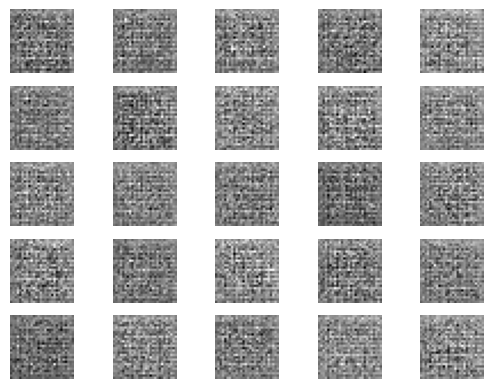

In [49]:
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
 # define subplot
 plt.subplot(5, 5, 1 + i)
 # turn off axis labels
 plt.axis('off')
 # plot single image
 plt.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
plt.show()

In [50]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
 # make weights in the discriminator not trainable
 d_model.trainable = False
 # connect them
 model = Sequential()
 # add generator
 model.add(g_model)
 # add the discriminator
 model.add(d_model)
 # compile model
 opt = Adam(0.0002, 0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model

In [51]:
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential_7 (Sequential)   (None, 1)                 40705     
                                                                 
Total params: 1204994 (4.60 MB)
Trainable params: 1164289 (4.44 MB)
Non-trainable params: 40705 (159.00 KB)
_________________________________________________________________


In [52]:
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
 # manually enumerate epochs
 for i in range(n_epochs):
 # prepare points in latent space as input for the generator
     x_gan = generate_latent_points(latent_dim, n_batch)
 # create inverted labels for the fake samples
     y_gan = ones((n_batch, 1))
 # update the generator via the discriminator's error
     gan_model.train_on_batch(x_gan, y_gan)

In [53]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))


In [54]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()

In [55]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake, epoch)

In [56]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
 # manually enumerate epochs
    for i in range(n_epochs):
 # enumerate batches over the training set
        for j in range(bat_per_epo):
 # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
 # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
 # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
 # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
 # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
 # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
 # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
 # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
 # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

4/4 [==============================] - 1s 88ms/step
>1, 1/234, d=0.701, g=0.706
4/4 [==============================] - 0s 87ms/step
>1, 2/234, d=0.692, g=0.718
4/4 [==============================] - 0s 85ms/step
>1, 3/234, d=0.689, g=0.728
4/4 [==============================] - 0s 90ms/step
>1, 4/234, d=0.678, g=0.747
4/4 [==============================] - 0s 86ms/step
>1, 5/234, d=0.674, g=0.760
4/4 [==============================] - 0s 89ms/step
>1, 6/234, d=0.673, g=0.772
4/4 [==============================] - 0s 85ms/step
>1, 7/234, d=0.662, g=0.782
4/4 [==============================] - 0s 88ms/step
>1, 8/234, d=0.663, g=0.791
4/4 [==============================] - 0s 79ms/step
>1, 9/234, d=0.656, g=0.794
4/4 [==============================] - 0s 95ms/step
>1, 10/234, d=0.656, g=0.798
4/4 [==============================] - 0s 90ms/step
>1, 11/234, d=0.656, g=0.788
4/4 [==============================] - 0s 84ms/step
>1, 12/234, d=0.657, g=0.776
4/4 [==============================] 

4/4 [==============================] - 0s 80ms/step
>1, 102/234, d=0.346, g=1.109
4/4 [==============================] - 0s 80ms/step
>1, 103/234, d=0.343, g=1.088
4/4 [==============================] - 0s 84ms/step
>1, 104/234, d=0.346, g=1.056
4/4 [==============================] - 0s 85ms/step
>1, 105/234, d=0.346, g=1.009
4/4 [==============================] - 0s 84ms/step
>1, 106/234, d=0.354, g=1.013
4/4 [==============================] - 0s 76ms/step
>1, 107/234, d=0.374, g=0.989
4/4 [==============================] - 0s 79ms/step
>1, 108/234, d=0.366, g=0.984
4/4 [==============================] - 0s 73ms/step
>1, 109/234, d=0.372, g=0.995
4/4 [==============================] - 0s 70ms/step
>1, 110/234, d=0.382, g=0.962
4/4 [==============================] - 0s 87ms/step
>1, 111/234, d=0.382, g=0.968
4/4 [==============================] - 0s 79ms/step
>1, 112/234, d=0.410, g=0.947
4/4 [==============================] - 0s 84ms/step
>1, 113/234, d=0.410, g=0.930
4/4 [===========

4/4 [==============================] - 0s 79ms/step
>1, 202/234, d=0.746, g=0.760
4/4 [==============================] - 0s 77ms/step
>1, 203/234, d=0.744, g=0.769
4/4 [==============================] - 0s 67ms/step
>1, 204/234, d=0.731, g=0.753
4/4 [==============================] - 0s 82ms/step
>1, 205/234, d=0.734, g=0.777
4/4 [==============================] - 0s 81ms/step
>1, 206/234, d=0.722, g=0.777
4/4 [==============================] - 0s 84ms/step
>1, 207/234, d=0.703, g=0.775
4/4 [==============================] - 0s 85ms/step
>1, 208/234, d=0.706, g=0.790
4/4 [==============================] - 0s 77ms/step
>1, 209/234, d=0.696, g=0.799
4/4 [==============================] - 0s 78ms/step
>1, 210/234, d=0.690, g=0.802
4/4 [==============================] - 0s 78ms/step
>1, 211/234, d=0.685, g=0.812
4/4 [==============================] - 0s 77ms/step
>1, 212/234, d=0.695, g=0.809
4/4 [==============================] - 0s 77ms/step
>1, 213/234, d=0.675, g=0.823
4/4 [===========

4/4 [==============================] - 0s 77ms/step
>2, 69/234, d=0.707, g=0.752
4/4 [==============================] - 0s 76ms/step
>2, 70/234, d=0.715, g=0.761
4/4 [==============================] - 0s 79ms/step
>2, 71/234, d=0.699, g=0.756
4/4 [==============================] - 0s 79ms/step
>2, 72/234, d=0.718, g=0.761
4/4 [==============================] - 0s 79ms/step
>2, 73/234, d=0.705, g=0.764
4/4 [==============================] - 0s 79ms/step
>2, 74/234, d=0.697, g=0.765
4/4 [==============================] - 0s 82ms/step
>2, 75/234, d=0.698, g=0.762
4/4 [==============================] - 0s 82ms/step
>2, 76/234, d=0.697, g=0.760
4/4 [==============================] - 0s 77ms/step
>2, 77/234, d=0.689, g=0.737
4/4 [==============================] - 0s 77ms/step
>2, 78/234, d=0.684, g=0.738
4/4 [==============================] - 0s 76ms/step
>2, 79/234, d=0.677, g=0.735
4/4 [==============================] - 0s 81ms/step
>2, 80/234, d=0.684, g=0.718
4/4 [=======================

4/4 [==============================] - 0s 80ms/step
>2, 169/234, d=0.709, g=0.675
4/4 [==============================] - 0s 77ms/step
>2, 170/234, d=0.715, g=0.677
4/4 [==============================] - 0s 82ms/step
>2, 171/234, d=0.702, g=0.685
4/4 [==============================] - 0s 84ms/step
>2, 172/234, d=0.706, g=0.685
4/4 [==============================] - 0s 79ms/step
>2, 173/234, d=0.697, g=0.683
4/4 [==============================] - 0s 79ms/step
>2, 174/234, d=0.702, g=0.690
4/4 [==============================] - 0s 71ms/step
>2, 175/234, d=0.720, g=0.682
4/4 [==============================] - 0s 74ms/step
>2, 176/234, d=0.703, g=0.684
4/4 [==============================] - 0s 70ms/step
>2, 177/234, d=0.681, g=0.682
4/4 [==============================] - 0s 69ms/step
>2, 178/234, d=0.704, g=0.686
4/4 [==============================] - 0s 85ms/step
>2, 179/234, d=0.695, g=0.687
4/4 [==============================] - 0s 81ms/step
>2, 180/234, d=0.700, g=0.689
4/4 [===========

4/4 [==============================] - 0s 75ms/step
>3, 35/234, d=0.683, g=0.791
4/4 [==============================] - 0s 77ms/step
>3, 36/234, d=0.679, g=0.814
4/4 [==============================] - 0s 68ms/step
>3, 37/234, d=0.670, g=0.816
4/4 [==============================] - 0s 71ms/step
>3, 38/234, d=0.680, g=0.804
4/4 [==============================] - 0s 87ms/step
>3, 39/234, d=0.689, g=0.808
4/4 [==============================] - 0s 79ms/step
>3, 40/234, d=0.672, g=0.800
4/4 [==============================] - 0s 90ms/step
>3, 41/234, d=0.681, g=0.781
4/4 [==============================] - 0s 85ms/step
>3, 42/234, d=0.666, g=0.774
4/4 [==============================] - 0s 82ms/step
>3, 43/234, d=0.676, g=0.766
4/4 [==============================] - 0s 77ms/step
>3, 44/234, d=0.671, g=0.776
4/4 [==============================] - 0s 79ms/step
>3, 45/234, d=0.679, g=0.764
4/4 [==============================] - 0s 76ms/step
>3, 46/234, d=0.680, g=0.761
4/4 [=======================

4/4 [==============================] - 0s 84ms/step
>3, 136/234, d=0.682, g=0.723
4/4 [==============================] - 0s 81ms/step
>3, 137/234, d=0.698, g=0.727
4/4 [==============================] - 0s 74ms/step
>3, 138/234, d=0.686, g=0.712
4/4 [==============================] - 0s 77ms/step
>3, 139/234, d=0.696, g=0.720
4/4 [==============================] - 0s 79ms/step
>3, 140/234, d=0.683, g=0.721
4/4 [==============================] - 0s 74ms/step
>3, 141/234, d=0.694, g=0.716
4/4 [==============================] - 0s 85ms/step
>3, 142/234, d=0.693, g=0.711
4/4 [==============================] - 0s 85ms/step
>3, 143/234, d=0.694, g=0.707
4/4 [==============================] - 0s 82ms/step
>3, 144/234, d=0.681, g=0.713
4/4 [==============================] - 0s 82ms/step
>3, 145/234, d=0.691, g=0.712
4/4 [==============================] - 0s 78ms/step
>3, 146/234, d=0.696, g=0.694
4/4 [==============================] - 0s 77ms/step
>3, 147/234, d=0.696, g=0.706
4/4 [===========

4/4 [==============================] - 0s 72ms/step
>4, 2/234, d=0.678, g=0.710
4/4 [==============================] - 0s 67ms/step
>4, 3/234, d=0.683, g=0.731
4/4 [==============================] - 0s 63ms/step
>4, 4/234, d=0.673, g=0.733
4/4 [==============================] - 0s 69ms/step
>4, 5/234, d=0.684, g=0.737
4/4 [==============================] - 0s 66ms/step
>4, 6/234, d=0.683, g=0.727
4/4 [==============================] - 0s 64ms/step
>4, 7/234, d=0.684, g=0.731
4/4 [==============================] - 0s 71ms/step
>4, 8/234, d=0.676, g=0.726
4/4 [==============================] - 0s 67ms/step
>4, 9/234, d=0.670, g=0.732
4/4 [==============================] - 0s 68ms/step
>4, 10/234, d=0.682, g=0.715
4/4 [==============================] - 0s 68ms/step
>4, 11/234, d=0.680, g=0.727
4/4 [==============================] - 0s 64ms/step
>4, 12/234, d=0.691, g=0.716
4/4 [==============================] - 0s 66ms/step
>4, 13/234, d=0.681, g=0.712
4/4 [==============================]

4/4 [==============================] - 0s 65ms/step
>4, 103/234, d=0.696, g=0.691
4/4 [==============================] - 0s 66ms/step
>4, 104/234, d=0.698, g=0.702
4/4 [==============================] - 0s 66ms/step
>4, 105/234, d=0.697, g=0.713
4/4 [==============================] - 0s 63ms/step
>4, 106/234, d=0.694, g=0.752
4/4 [==============================] - 0s 63ms/step
>4, 107/234, d=0.689, g=0.763
4/4 [==============================] - 0s 67ms/step
>4, 108/234, d=0.688, g=0.771
4/4 [==============================] - 0s 68ms/step
>4, 109/234, d=0.690, g=0.763
4/4 [==============================] - 0s 72ms/step
>4, 110/234, d=0.682, g=0.771
4/4 [==============================] - 0s 70ms/step
>4, 111/234, d=0.706, g=0.748
4/4 [==============================] - 0s 76ms/step
>4, 112/234, d=0.702, g=0.744
4/4 [==============================] - 0s 70ms/step
>4, 113/234, d=0.702, g=0.720
4/4 [==============================] - 0s 70ms/step
>4, 114/234, d=0.706, g=0.714
4/4 [===========

4/4 [==============================] - 0s 74ms/step
>4, 203/234, d=0.696, g=0.685
4/4 [==============================] - 0s 61ms/step
>4, 204/234, d=0.693, g=0.685
4/4 [==============================] - 0s 62ms/step
>4, 205/234, d=0.702, g=0.691
4/4 [==============================] - 0s 75ms/step
>4, 206/234, d=0.690, g=0.688
4/4 [==============================] - 0s 70ms/step
>4, 207/234, d=0.701, g=0.691
4/4 [==============================] - 0s 68ms/step
>4, 208/234, d=0.694, g=0.695
4/4 [==============================] - 0s 65ms/step
>4, 209/234, d=0.693, g=0.699
4/4 [==============================] - 0s 67ms/step
>4, 210/234, d=0.708, g=0.709
4/4 [==============================] - 0s 72ms/step
>4, 211/234, d=0.696, g=0.716
4/4 [==============================] - 0s 64ms/step
>4, 212/234, d=0.695, g=0.723
4/4 [==============================] - 0s 62ms/step
>4, 213/234, d=0.696, g=0.733
4/4 [==============================] - 0s 71ms/step
>4, 214/234, d=0.688, g=0.733
4/4 [===========

4/4 [==============================] - 0s 70ms/step
>5, 70/234, d=0.687, g=0.697
4/4 [==============================] - 0s 77ms/step
>5, 71/234, d=0.681, g=0.703
4/4 [==============================] - 0s 70ms/step
>5, 72/234, d=0.685, g=0.693
4/4 [==============================] - 0s 72ms/step
>5, 73/234, d=0.678, g=0.685
4/4 [==============================] - 0s 70ms/step
>5, 74/234, d=0.681, g=0.677
4/4 [==============================] - 0s 95ms/step
>5, 75/234, d=0.680, g=0.691
4/4 [==============================] - 0s 70ms/step
>5, 76/234, d=0.668, g=0.698
4/4 [==============================] - 0s 66ms/step
>5, 77/234, d=0.690, g=0.686
4/4 [==============================] - 0s 68ms/step
>5, 78/234, d=0.676, g=0.689
4/4 [==============================] - 0s 72ms/step
>5, 79/234, d=0.677, g=0.717
4/4 [==============================] - 0s 67ms/step
>5, 80/234, d=0.678, g=0.709
4/4 [==============================] - 0s 74ms/step
>5, 81/234, d=0.681, g=0.717
4/4 [=======================

4/4 [==============================] - 0s 71ms/step
>5, 170/234, d=0.687, g=0.704
4/4 [==============================] - 0s 73ms/step
>5, 171/234, d=0.686, g=0.763
4/4 [==============================] - 0s 68ms/step
>5, 172/234, d=0.669, g=0.808
4/4 [==============================] - 0s 70ms/step
>5, 173/234, d=0.668, g=0.836
4/4 [==============================] - 0s 72ms/step
>5, 174/234, d=0.664, g=0.843
4/4 [==============================] - 0s 73ms/step
>5, 175/234, d=0.680, g=0.833
4/4 [==============================] - 0s 76ms/step
>5, 176/234, d=0.674, g=0.812
4/4 [==============================] - 0s 70ms/step
>5, 177/234, d=0.688, g=0.768
4/4 [==============================] - 0s 68ms/step
>5, 178/234, d=0.688, g=0.729
4/4 [==============================] - 0s 70ms/step
>5, 179/234, d=0.691, g=0.706
4/4 [==============================] - 0s 77ms/step
>5, 180/234, d=0.683, g=0.685
4/4 [==============================] - 0s 69ms/step
>5, 181/234, d=0.679, g=0.666
4/4 [===========

4/4 [==============================] - 0s 79ms/step
>6, 36/234, d=0.685, g=0.778
4/4 [==============================] - 0s 77ms/step
>6, 37/234, d=0.681, g=0.771
4/4 [==============================] - 0s 83ms/step
>6, 38/234, d=0.682, g=0.759
4/4 [==============================] - 0s 62ms/step
>6, 39/234, d=0.689, g=0.751
4/4 [==============================] - 0s 61ms/step
>6, 40/234, d=0.687, g=0.724
4/4 [==============================] - 0s 76ms/step
>6, 41/234, d=0.681, g=0.715
4/4 [==============================] - 0s 86ms/step
>6, 42/234, d=0.681, g=0.697
4/4 [==============================] - 0s 85ms/step
>6, 43/234, d=0.676, g=0.691
4/4 [==============================] - 0s 84ms/step
>6, 44/234, d=0.671, g=0.677
4/4 [==============================] - 0s 76ms/step
>6, 45/234, d=0.673, g=0.671
4/4 [==============================] - 0s 73ms/step
>6, 46/234, d=0.672, g=0.669
4/4 [==============================] - 0s 78ms/step
>6, 47/234, d=0.675, g=0.673
4/4 [=======================

4/4 [==============================] - 0s 42ms/step
>6, 137/234, d=0.710, g=0.742
4/4 [==============================] - 0s 42ms/step
>6, 138/234, d=0.700, g=0.757
4/4 [==============================] - 0s 63ms/step
>6, 139/234, d=0.693, g=0.756
4/4 [==============================] - 0s 58ms/step
>6, 140/234, d=0.687, g=0.768
4/4 [==============================] - 0s 56ms/step
>6, 141/234, d=0.682, g=0.774
4/4 [==============================] - 0s 64ms/step
>6, 142/234, d=0.684, g=0.755
4/4 [==============================] - 0s 62ms/step
>6, 143/234, d=0.673, g=0.755
4/4 [==============================] - 0s 48ms/step
>6, 144/234, d=0.681, g=0.743
4/4 [==============================] - 0s 54ms/step
>6, 145/234, d=0.689, g=0.729
4/4 [==============================] - 0s 46ms/step
>6, 146/234, d=0.687, g=0.721
4/4 [==============================] - 0s 42ms/step
>6, 147/234, d=0.678, g=0.703
4/4 [==============================] - 0s 52ms/step
>6, 148/234, d=0.676, g=0.689
4/4 [===========

4/4 [==============================] - 0s 54ms/step
>7, 3/234, d=0.699, g=0.696
4/4 [==============================] - 0s 57ms/step
>7, 4/234, d=0.695, g=0.714
4/4 [==============================] - 0s 58ms/step
>7, 5/234, d=0.682, g=0.737
4/4 [==============================] - 0s 49ms/step
>7, 6/234, d=0.686, g=0.737
4/4 [==============================] - 0s 49ms/step
>7, 7/234, d=0.679, g=0.748
4/4 [==============================] - 0s 64ms/step
>7, 8/234, d=0.689, g=0.743
4/4 [==============================] - 0s 68ms/step
>7, 9/234, d=0.685, g=0.756
4/4 [==============================] - 0s 49ms/step
>7, 10/234, d=0.670, g=0.758
4/4 [==============================] - 0s 56ms/step
>7, 11/234, d=0.675, g=0.750
4/4 [==============================] - 0s 49ms/step
>7, 12/234, d=0.679, g=0.741
4/4 [==============================] - 0s 44ms/step
>7, 13/234, d=0.678, g=0.732
4/4 [==============================] - 0s 47ms/step
>7, 14/234, d=0.678, g=0.730
4/4 [==============================

4/4 [==============================] - 0s 71ms/step
>7, 104/234, d=0.685, g=0.700
4/4 [==============================] - 0s 84ms/step
>7, 105/234, d=0.685, g=0.691
4/4 [==============================] - 0s 73ms/step
>7, 106/234, d=0.685, g=0.684
4/4 [==============================] - 0s 52ms/step
>7, 107/234, d=0.692, g=0.693
4/4 [==============================] - 0s 47ms/step
>7, 108/234, d=0.693, g=0.687
4/4 [==============================] - 0s 68ms/step
>7, 109/234, d=0.697, g=0.692
4/4 [==============================] - 0s 57ms/step
>7, 110/234, d=0.692, g=0.690
4/4 [==============================] - 0s 70ms/step
>7, 111/234, d=0.692, g=0.695
4/4 [==============================] - 0s 71ms/step
>7, 112/234, d=0.689, g=0.700
4/4 [==============================] - 0s 58ms/step
>7, 113/234, d=0.698, g=0.700
4/4 [==============================] - 0s 42ms/step
>7, 114/234, d=0.695, g=0.705
4/4 [==============================] - 0s 42ms/step
>7, 115/234, d=0.690, g=0.701
4/4 [===========

4/4 [==============================] - 0s 71ms/step
>7, 204/234, d=0.692, g=0.724
4/4 [==============================] - 0s 48ms/step
>7, 205/234, d=0.680, g=0.738
4/4 [==============================] - 0s 51ms/step
>7, 206/234, d=0.689, g=0.736
4/4 [==============================] - 0s 47ms/step
>7, 207/234, d=0.691, g=0.746
4/4 [==============================] - 0s 56ms/step
>7, 208/234, d=0.689, g=0.750
4/4 [==============================] - 0s 75ms/step
>7, 209/234, d=0.684, g=0.744
4/4 [==============================] - 0s 58ms/step
>7, 210/234, d=0.686, g=0.736
4/4 [==============================] - 0s 59ms/step
>7, 211/234, d=0.680, g=0.726
4/4 [==============================] - 0s 72ms/step
>7, 212/234, d=0.679, g=0.720
4/4 [==============================] - 0s 59ms/step
>7, 213/234, d=0.680, g=0.702
4/4 [==============================] - 0s 59ms/step
>7, 214/234, d=0.677, g=0.714
4/4 [==============================] - 0s 72ms/step
>7, 215/234, d=0.669, g=0.699
4/4 [===========

4/4 [==============================] - 0s 67ms/step
>8, 71/234, d=0.688, g=0.707
4/4 [==============================] - 0s 66ms/step
>8, 72/234, d=0.689, g=0.710
4/4 [==============================] - 0s 79ms/step
>8, 73/234, d=0.688, g=0.708
4/4 [==============================] - 0s 92ms/step
>8, 74/234, d=0.682, g=0.714
4/4 [==============================] - 0s 78ms/step
>8, 75/234, d=0.687, g=0.714
4/4 [==============================] - 0s 83ms/step
>8, 76/234, d=0.685, g=0.709
4/4 [==============================] - 0s 88ms/step
>8, 77/234, d=0.683, g=0.704
4/4 [==============================] - 0s 94ms/step
>8, 78/234, d=0.684, g=0.700
4/4 [==============================] - 0s 53ms/step
>8, 79/234, d=0.679, g=0.707
4/4 [==============================] - 0s 76ms/step
>8, 80/234, d=0.688, g=0.714
4/4 [==============================] - 0s 87ms/step
>8, 81/234, d=0.675, g=0.718
4/4 [==============================] - 0s 74ms/step
>8, 82/234, d=0.683, g=0.711
4/4 [=======================

4/4 [==============================] - 0s 59ms/step
>8, 171/234, d=0.708, g=0.679
4/4 [==============================] - 0s 69ms/step
>8, 172/234, d=0.699, g=0.675
4/4 [==============================] - 0s 74ms/step
>8, 173/234, d=0.694, g=0.676
4/4 [==============================] - 0s 77ms/step
>8, 174/234, d=0.698, g=0.678
4/4 [==============================] - 0s 78ms/step
>8, 175/234, d=0.701, g=0.691
4/4 [==============================] - 0s 72ms/step
>8, 176/234, d=0.698, g=0.688
4/4 [==============================] - 0s 68ms/step
>8, 177/234, d=0.693, g=0.702
4/4 [==============================] - 0s 57ms/step
>8, 178/234, d=0.698, g=0.713
4/4 [==============================] - 0s 62ms/step
>8, 179/234, d=0.696, g=0.724
4/4 [==============================] - 0s 70ms/step
>8, 180/234, d=0.695, g=0.725
4/4 [==============================] - 0s 73ms/step
>8, 181/234, d=0.697, g=0.731
4/4 [==============================] - 0s 75ms/step
>8, 182/234, d=0.692, g=0.732
4/4 [===========

4/4 [==============================] - 0s 67ms/step
>9, 37/234, d=0.681, g=0.748
4/4 [==============================] - 0s 71ms/step
>9, 38/234, d=0.680, g=0.771
4/4 [==============================] - 0s 77ms/step
>9, 39/234, d=0.681, g=0.770
4/4 [==============================] - 0s 61ms/step
>9, 40/234, d=0.679, g=0.772
4/4 [==============================] - 0s 61ms/step
>9, 41/234, d=0.678, g=0.758
4/4 [==============================] - 0s 63ms/step
>9, 42/234, d=0.672, g=0.736
4/4 [==============================] - 0s 71ms/step
>9, 43/234, d=0.682, g=0.714
4/4 [==============================] - 0s 59ms/step
>9, 44/234, d=0.678, g=0.696
4/4 [==============================] - 0s 62ms/step
>9, 45/234, d=0.678, g=0.693
4/4 [==============================] - 0s 70ms/step
>9, 46/234, d=0.678, g=0.690
4/4 [==============================] - 0s 61ms/step
>9, 47/234, d=0.685, g=0.687
4/4 [==============================] - 0s 70ms/step
>9, 48/234, d=0.683, g=0.688
4/4 [=======================

4/4 [==============================] - 0s 67ms/step
>9, 138/234, d=0.680, g=0.722
4/4 [==============================] - 0s 67ms/step
>9, 139/234, d=0.679, g=0.717
4/4 [==============================] - 0s 46ms/step
>9, 140/234, d=0.678, g=0.705
4/4 [==============================] - 0s 109ms/step
>9, 141/234, d=0.674, g=0.709
4/4 [==============================] - 0s 60ms/step
>9, 142/234, d=0.682, g=0.713
4/4 [==============================] - 0s 72ms/step
>9, 143/234, d=0.674, g=0.708
4/4 [==============================] - 0s 67ms/step
>9, 144/234, d=0.685, g=0.698
4/4 [==============================] - 0s 64ms/step
>9, 145/234, d=0.671, g=0.694
4/4 [==============================] - 0s 63ms/step
>9, 146/234, d=0.679, g=0.689
4/4 [==============================] - 0s 65ms/step
>9, 147/234, d=0.674, g=0.709
4/4 [==============================] - 0s 79ms/step
>9, 148/234, d=0.681, g=0.725
4/4 [==============================] - 0s 52ms/step
>9, 149/234, d=0.676, g=0.728
4/4 [==========

4/4 [==============================] - 0s 81ms/step
>10, 4/234, d=0.680, g=0.715
4/4 [==============================] - 0s 79ms/step
>10, 5/234, d=0.681, g=0.719
4/4 [==============================] - 0s 57ms/step
>10, 6/234, d=0.682, g=0.713
4/4 [==============================] - 0s 57ms/step
>10, 7/234, d=0.674, g=0.695
4/4 [==============================] - 0s 60ms/step
>10, 8/234, d=0.676, g=0.699
4/4 [==============================] - 0s 58ms/step
>10, 9/234, d=0.671, g=0.701
4/4 [==============================] - 0s 57ms/step
>10, 10/234, d=0.672, g=0.708
4/4 [==============================] - 0s 65ms/step
>10, 11/234, d=0.677, g=0.709
4/4 [==============================] - 0s 79ms/step
>10, 12/234, d=0.683, g=0.708
4/4 [==============================] - 0s 68ms/step
>10, 13/234, d=0.677, g=0.721
4/4 [==============================] - 0s 73ms/step
>10, 14/234, d=0.681, g=0.714
4/4 [==============================] - 0s 71ms/step
>10, 15/234, d=0.681, g=0.715
4/4 [=================

4/4 [==============================] - 0s 69ms/step
>10, 104/234, d=0.684, g=0.698
4/4 [==============================] - 0s 88ms/step
>10, 105/234, d=0.676, g=0.700
4/4 [==============================] - 0s 65ms/step
>10, 106/234, d=0.684, g=0.696
4/4 [==============================] - 0s 67ms/step
>10, 107/234, d=0.680, g=0.695
4/4 [==============================] - 0s 55ms/step
>10, 108/234, d=0.680, g=0.692
4/4 [==============================] - 0s 71ms/step
>10, 109/234, d=0.681, g=0.698
4/4 [==============================] - 0s 57ms/step
>10, 110/234, d=0.677, g=0.694
4/4 [==============================] - 0s 59ms/step
>10, 111/234, d=0.677, g=0.712
4/4 [==============================] - 0s 70ms/step
>10, 112/234, d=0.679, g=0.729
4/4 [==============================] - 0s 77ms/step
>10, 113/234, d=0.679, g=0.725
4/4 [==============================] - 0s 71ms/step
>10, 114/234, d=0.679, g=0.731
4/4 [==============================] - 0s 62ms/step
>10, 115/234, d=0.685, g=0.724
4/4 

4/4 [==============================] - 0s 59ms/step
>10, 203/234, d=0.695, g=0.701
4/4 [==============================] - 0s 79ms/step
>10, 204/234, d=0.687, g=0.694
4/4 [==============================] - 0s 67ms/step
>10, 205/234, d=0.691, g=0.689
4/4 [==============================] - 0s 61ms/step
>10, 206/234, d=0.687, g=0.688
4/4 [==============================] - 0s 86ms/step
>10, 207/234, d=0.681, g=0.688
4/4 [==============================] - 0s 94ms/step
>10, 208/234, d=0.679, g=0.712
4/4 [==============================] - 0s 73ms/step
>10, 209/234, d=0.678, g=0.730
4/4 [==============================] - 0s 77ms/step
>10, 210/234, d=0.683, g=0.737
4/4 [==============================] - 0s 84ms/step
>10, 211/234, d=0.679, g=0.748
4/4 [==============================] - 0s 71ms/step
>10, 212/234, d=0.678, g=0.750
4/4 [==============================] - 0s 73ms/step
>10, 213/234, d=0.682, g=0.738
4/4 [==============================] - 0s 88ms/step
>10, 214/234, d=0.680, g=0.716
4/4 

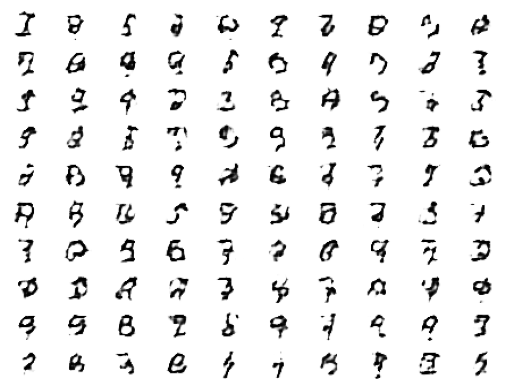

4/4 [==============================] - 0s 35ms/step
>11, 1/234, d=0.688, g=0.703
4/4 [==============================] - 0s 63ms/step
>11, 2/234, d=0.698, g=0.719
4/4 [==============================] - 0s 67ms/step
>11, 3/234, d=0.694, g=0.723
4/4 [==============================] - 0s 71ms/step
>11, 4/234, d=0.688, g=0.721
4/4 [==============================] - 0s 70ms/step
>11, 5/234, d=0.684, g=0.727
4/4 [==============================] - 0s 77ms/step
>11, 6/234, d=0.685, g=0.728
4/4 [==============================] - 0s 86ms/step
>11, 7/234, d=0.678, g=0.727
4/4 [==============================] - 0s 68ms/step
>11, 8/234, d=0.673, g=0.723
4/4 [==============================] - 0s 82ms/step
>11, 9/234, d=0.682, g=0.723
4/4 [==============================] - 1s 106ms/step
>11, 10/234, d=0.686, g=0.705
4/4 [==============================] - 0s 96ms/step
>11, 11/234, d=0.674, g=0.722
4/4 [==============================] - 0s 90ms/step
>11, 12/234, d=0.681, g=0.710
4/4 [===================

4/4 [==============================] - 0s 73ms/step
>11, 101/234, d=0.687, g=0.730
4/4 [==============================] - 0s 89ms/step
>11, 102/234, d=0.672, g=0.741
4/4 [==============================] - 0s 86ms/step
>11, 103/234, d=0.676, g=0.749
4/4 [==============================] - 0s 84ms/step
>11, 104/234, d=0.686, g=0.752
4/4 [==============================] - 0s 81ms/step
>11, 105/234, d=0.684, g=0.722
4/4 [==============================] - 0s 89ms/step
>11, 106/234, d=0.691, g=0.705
4/4 [==============================] - 0s 84ms/step
>11, 107/234, d=0.694, g=0.669
4/4 [==============================] - 0s 82ms/step
>11, 108/234, d=0.693, g=0.668
4/4 [==============================] - 0s 83ms/step
>11, 109/234, d=0.686, g=0.674
4/4 [==============================] - 0s 81ms/step
>11, 110/234, d=0.689, g=0.678
4/4 [==============================] - 0s 84ms/step
>11, 111/234, d=0.695, g=0.705
4/4 [==============================] - 0s 81ms/step
>11, 112/234, d=0.690, g=0.725
4/4 

4/4 [==============================] - 0s 77ms/step
>11, 200/234, d=0.682, g=0.736
4/4 [==============================] - 0s 78ms/step
>11, 201/234, d=0.679, g=0.744
4/4 [==============================] - 0s 73ms/step
>11, 202/234, d=0.683, g=0.758
4/4 [==============================] - 0s 76ms/step
>11, 203/234, d=0.665, g=0.770
4/4 [==============================] - 0s 82ms/step
>11, 204/234, d=0.673, g=0.748
4/4 [==============================] - 0s 81ms/step
>11, 205/234, d=0.660, g=0.717
4/4 [==============================] - 0s 71ms/step
>11, 206/234, d=0.674, g=0.703
4/4 [==============================] - 0s 72ms/step
>11, 207/234, d=0.681, g=0.693
4/4 [==============================] - 0s 78ms/step
>11, 208/234, d=0.680, g=0.714
4/4 [==============================] - 0s 81ms/step
>11, 209/234, d=0.690, g=0.699
4/4 [==============================] - 0s 77ms/step
>11, 210/234, d=0.679, g=0.702
4/4 [==============================] - 0s 80ms/step
>11, 211/234, d=0.674, g=0.693
4/4 

4/4 [==============================] - 0s 74ms/step
>12, 65/234, d=0.690, g=0.736
4/4 [==============================] - 0s 81ms/step
>12, 66/234, d=0.687, g=0.713
4/4 [==============================] - 0s 74ms/step
>12, 67/234, d=0.685, g=0.694
4/4 [==============================] - 0s 77ms/step
>12, 68/234, d=0.683, g=0.703
4/4 [==============================] - 0s 77ms/step
>12, 69/234, d=0.684, g=0.699
4/4 [==============================] - 0s 77ms/step
>12, 70/234, d=0.684, g=0.713
4/4 [==============================] - 0s 82ms/step
>12, 71/234, d=0.690, g=0.705
4/4 [==============================] - 0s 62ms/step
>12, 72/234, d=0.699, g=0.704
4/4 [==============================] - 0s 75ms/step
>12, 73/234, d=0.691, g=0.696
4/4 [==============================] - 0s 70ms/step
>12, 74/234, d=0.679, g=0.705
4/4 [==============================] - 0s 82ms/step
>12, 75/234, d=0.690, g=0.715
4/4 [==============================] - 0s 75ms/step
>12, 76/234, d=0.685, g=0.702
4/4 [===========

4/4 [==============================] - 0s 80ms/step
>12, 164/234, d=0.687, g=0.698
4/4 [==============================] - 0s 80ms/step
>12, 165/234, d=0.690, g=0.692
4/4 [==============================] - 0s 78ms/step
>12, 166/234, d=0.678, g=0.688
4/4 [==============================] - 0s 81ms/step
>12, 167/234, d=0.670, g=0.713
4/4 [==============================] - 0s 80ms/step
>12, 168/234, d=0.685, g=0.734
4/4 [==============================] - 0s 76ms/step
>12, 169/234, d=0.685, g=0.762
4/4 [==============================] - 0s 82ms/step
>12, 170/234, d=0.678, g=0.762
4/4 [==============================] - 0s 82ms/step
>12, 171/234, d=0.682, g=0.764
4/4 [==============================] - 0s 86ms/step
>12, 172/234, d=0.675, g=0.753
4/4 [==============================] - 0s 78ms/step
>12, 173/234, d=0.681, g=0.711
4/4 [==============================] - 0s 80ms/step
>12, 174/234, d=0.685, g=0.693
4/4 [==============================] - 0s 83ms/step
>12, 175/234, d=0.681, g=0.677
4/4 

4/4 [==============================] - 0s 81ms/step
>13, 29/234, d=0.693, g=0.711
4/4 [==============================] - 0s 77ms/step
>13, 30/234, d=0.685, g=0.684
4/4 [==============================] - 0s 80ms/step
>13, 31/234, d=0.695, g=0.682
4/4 [==============================] - 0s 77ms/step
>13, 32/234, d=0.695, g=0.690
4/4 [==============================] - 0s 80ms/step
>13, 33/234, d=0.691, g=0.712
4/4 [==============================] - 0s 82ms/step
>13, 34/234, d=0.699, g=0.731
4/4 [==============================] - 0s 78ms/step
>13, 35/234, d=0.692, g=0.734
4/4 [==============================] - 0s 84ms/step
>13, 36/234, d=0.698, g=0.712
4/4 [==============================] - 0s 81ms/step
>13, 37/234, d=0.690, g=0.700
4/4 [==============================] - 0s 97ms/step
>13, 38/234, d=0.682, g=0.700
4/4 [==============================] - 0s 92ms/step
>13, 39/234, d=0.694, g=0.717
4/4 [==============================] - 0s 84ms/step
>13, 40/234, d=0.691, g=0.698
4/4 [===========

4/4 [==============================] - 0s 79ms/step
>13, 128/234, d=0.686, g=0.702
4/4 [==============================] - 0s 76ms/step
>13, 129/234, d=0.676, g=0.670
4/4 [==============================] - 0s 84ms/step
>13, 130/234, d=0.687, g=0.665
4/4 [==============================] - 0s 74ms/step
>13, 131/234, d=0.676, g=0.677
4/4 [==============================] - 0s 84ms/step
>13, 132/234, d=0.677, g=0.704
4/4 [==============================] - 0s 91ms/step
>13, 133/234, d=0.684, g=0.737
4/4 [==============================] - 0s 86ms/step
>13, 134/234, d=0.680, g=0.760
4/4 [==============================] - 0s 65ms/step
>13, 135/234, d=0.682, g=0.739
4/4 [==============================] - 0s 78ms/step
>13, 136/234, d=0.678, g=0.701
4/4 [==============================] - 0s 83ms/step
>13, 137/234, d=0.685, g=0.684
4/4 [==============================] - 0s 73ms/step
>13, 138/234, d=0.680, g=0.676
4/4 [==============================] - 0s 89ms/step
>13, 139/234, d=0.683, g=0.658
4/4 

4/4 [==============================] - 0s 79ms/step
>13, 227/234, d=0.685, g=0.681
4/4 [==============================] - 0s 79ms/step
>13, 228/234, d=0.689, g=0.686
4/4 [==============================] - 0s 87ms/step
>13, 229/234, d=0.690, g=0.704
4/4 [==============================] - 0s 79ms/step
>13, 230/234, d=0.683, g=0.703
4/4 [==============================] - 0s 94ms/step
>13, 231/234, d=0.690, g=0.699
4/4 [==============================] - 0s 85ms/step
>13, 232/234, d=0.688, g=0.694
4/4 [==============================] - 0s 84ms/step
>13, 233/234, d=0.692, g=0.690
4/4 [==============================] - 0s 79ms/step
>13, 234/234, d=0.690, g=0.702
4/4 [==============================] - 0s 75ms/step
>14, 1/234, d=0.685, g=0.705
4/4 [==============================] - 0s 79ms/step
>14, 2/234, d=0.692, g=0.701
4/4 [==============================] - 0s 82ms/step
>14, 3/234, d=0.686, g=0.695
4/4 [==============================] - 0s 90ms/step
>14, 4/234, d=0.685, g=0.691
4/4 [=======

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_sample()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)